## EDX: Principles of Machine Learning

#### DAT203.2

Microsoft EDX course on Machine Learning.  This notebook represents the final challenge problem. 

Challenge
Your challenge is to create a machine learning web service that predicts flight delays that are accurate to within 10 minutes when tested with the test data set that is provided with this course.
Start by creating a new Azure Machine Learning experiment, and giving it a suitable name (such as "Flight Predictions"). Then add the Flight Delay Data sample dataset to the experiment, and visualize its contents. This dataset consists of the following fields:

**Year**: The year in which the flight took place.

**Month**: The month in which the flight took place.

**DayofMonth**: The day of the month on which the flight took place.

**DayOfWeek**: The week day on which the flight took place.

**Carrier**: The airline operating the flight.

**OriginAirportID**: A numeric code indicating the departure airport.

**DestAirportID**: A numeric code indicating the destination airport.

**CRSDepTime**: The scheduled departure time in 24-hour format.

**DepDelay**: The number of minutes late or early that the flight departed.

**DepDel15**: A Boolean column indicating whether or not the flight departed 15 minutes or more late.

**CRSArrTime**: The scheduled arrival time.

**ArrDelay**: The number of minutes late or early that the flight arrived.
                
**ArrDel15**: Whether or not the flight arrived 15 or minutes more late. Cancelled: Whether or not the flight was cancelled.

You must use the techniques you have learned in this course to explore the dataset, and perform the necessary feature selection and engineering, model evaluation, and tuning to create a machine learning model that predicts the ArrDelay column.
After you have created a model, you must publish it as a web service and test it using the Test-Flights.csv test dataset provided. This dataset contains 25 observations in which the ArrDelay, ArrDel15, and Cancelled columns have been set to 0. You will score a point for each observation for which your model successfully predicts the ArrDelay label to within 10 minutes of the actual delay time.


- Resources

[Predicting Flights Delay Using Supervised Machine Learning](http://dataillumination.blogspot.com/2015/03/predicting-flights-delay-using.html)

In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  

In [5]:
df = pd.read_csv('../../data/azureml/dat203/Flight-Delays-Data.csv')

In [6]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,4,19,5,DL,11433,13303,837,-3.0,0.0,1138,1.0,0.0,0.0
1,2013,4,19,5,DL,14869,12478,1705,0.0,0.0,2336,-8.0,0.0,0.0
2,2013,4,19,5,DL,14057,14869,600,-4.0,0.0,851,-15.0,0.0,0.0
3,2013,4,19,5,DL,15016,11433,1630,28.0,1.0,1903,24.0,1.0,0.0
4,2013,4,19,5,DL,11193,12892,1615,-6.0,0.0,1805,-11.0,0.0,0.0


In [7]:
df.shape

(2719418, 14)

In [8]:
df.dtypes

Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
Carrier             object
OriginAirportID      int64
DestAirportID        int64
CRSDepTime           int64
DepDelay           float64
DepDel15           float64
CRSArrTime           int64
ArrDelay           float64
ArrDel15           float64
Cancelled          float64
dtype: object

In [9]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,2719418.0,2.719418e+06,2.719418e+06,2.719418e+06,2.719418e+06,2.719418e+06,2.719418e+06,2.691974e+06,2.691974e+06,2.719418e+06,2.690385e+06,2.719418e+06,2.719418e+06
mean,2013.0,6.979968e+00,1.579747e+01,3.898391e+00,1.274226e+04,1.274246e+04,1.326645e+03,1.053687e+01,2.023419e-01,1.505270e+03,6.637688e+00,2.166316e-01,1.067618e-02
std,0.0,1.984331e+00,8.799860e+00,1.985988e+00,1.501973e+03,1.501969e+03,4.713766e+02,3.609953e+01,4.017458e-01,4.939662e+02,3.864881e+01,4.119496e-01,1.027726e-01
min,2013.0,4.000000e+00,1.000000e+00,1.000000e+00,1.014000e+04,1.014000e+04,1.000000e+00,-6.300000e+01,0.000000e+00,1.000000e+00,-9.400000e+01,0.000000e+00,0.000000e+00
25%,2013.0,5.000000e+00,8.000000e+00,2.000000e+00,1.129200e+04,1.129200e+04,9.200000e+02,-4.000000e+00,0.000000e+00,1.120000e+03,-1.100000e+01,0.000000e+00,0.000000e+00
50%,2013.0,7.000000e+00,1.600000e+01,4.000000e+00,1.289200e+04,1.289200e+04,1.320000e+03,-1.000000e+00,0.000000e+00,1.528000e+03,-3.000000e+00,0.000000e+00,0.000000e+00
75%,2013.0,9.000000e+00,2.300000e+01,6.000000e+00,1.405700e+04,1.405700e+04,1.725000e+03,9.000000e+00,0.000000e+00,1.918000e+03,1.000000e+01,0.000000e+00,0.000000e+00
max,2013.0,1.000000e+01,3.100000e+01,7.000000e+00,1.537600e+04,1.537600e+04,2.359000e+03,1.863000e+03,1.000000e+00,2.359000e+03,1.845000e+03,1.000000e+00,1.000000e+00


In [10]:
df['Carrier'].unique()

array(['DL', 'AA', 'EV', 'B6', 'F9', 'FL', 'HA', 'MQ', '9E', 'AS', 'US',
       'UA', 'VX', 'WN', 'YV', 'OO'], dtype=object)

In [11]:
len(df['OriginAirportID'].unique())

70

In [12]:
len(df['DestAirportID'].unique())

70

In [13]:
df_test_set = pd.read_csv('../../data/azureml/dat203/Test-Flights.csv')
df_test_set.head()

,Row ID,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,1,2013,6,10,1,YV,14107,10800,1415,2,0,1534,0,0,0
1,2,2013,10,14,1,DL,10397,13244,2030,-2,0,2055,0,0,0
2,3,2013,6,19,3,AS,13891,14747,615,-3,0,848,0,0,0
3,4,2013,10,13,7,EV,10693,12953,950,-7,0,1302,0,0,0
4,5,2013,9,13,5,WN,13232,12191,1930,10,0,2155,0,0,0


In [14]:
df_test_set['Carrier'].unique()

array(['YV', 'DL', 'AS', 'EV', 'WN', 'OO', 'AA', 'FL', 'UA', '9E'],
      dtype=object)

In [15]:
df_test_set.describe()

,Row ID,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,25.000000,25.0,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0,25.0,25.0
mean,13.000000,2013.0,7.600000,15.040000,3.320000,12630.640000,12714.200000,1253.520000,12.760000,0.120000,1391.400000,0.0,0.0,0.0
std,7.359801,0.0,2.081666,8.923191,1.973153,1429.133942,1206.961129,560.579099,56.822296,0.331662,520.252983,0.0,0.0,0.0
min,1.000000,2013.0,4.000000,1.000000,1.000000,10397.000000,10529.000000,600.000000,-8.000000,0.000000,620.000000,0.0,0.0,0.0
25%,7.000000,2013.0,6.000000,8.000000,2.000000,11292.000000,12191.000000,925.000000,-3.000000,0.000000,1105.000000,0.0,0.0,0.0
50%,13.000000,2013.0,8.000000,14.000000,3.000000,13198.000000,13198.000000,1055.000000,-1.000000,0.000000,1302.000000,0.0,0.0,0.0
75%,19.000000,2013.0,9.000000,23.000000,5.000000,13891.000000,13244.000000,1600.000000,7.000000,0.000000,1720.000000,0.0,0.0,0.0
max,25.000000,2013.0,10.000000,30.000000,7.000000,15016.000000,14908.000000,2255.000000,283.000000,1.000000,2300.000000,0.0,0.0,0.0


### General Steps

- Prepare the data.

This includes add columns, removing columns, looking for missing values or values that are not valid

- Visualize the data.

Look at the data to get a sense for the what the data can tell you

- Run and measure various models against the data.



In [16]:
df.isnull().sum()

Year                   0
Month                  0
DayofMonth             0
DayOfWeek              0
Carrier                0
OriginAirportID        0
DestAirportID          0
CRSDepTime             0
DepDelay           27444
DepDel15           27444
CRSArrTime             0
ArrDelay           29033
ArrDel15               0
Cancelled              0
dtype: int64

I suspect that the ArrDelay field is empty because the flight was cancelled.  Add up all of the cancelled flights and see if it matches the number of null ArrDelay fields.

In [17]:
df['Cancelled'].sum()

29033.0

Remove the null ArrDelay records.

In [18]:
df.dropna(subset=['ArrDelay'], how='any', inplace=True)

In [19]:
df.isnull().sum()

Year               0
Month              0
DayofMonth         0
DayOfWeek          0
Carrier            0
OriginAirportID    0
DestAirportID      0
CRSDepTime         0
DepDelay           0
DepDel15           0
CRSArrTime         0
ArrDelay           0
ArrDel15           0
Cancelled          0
dtype: int64

In [20]:
df.shape

(2690385, 14)

In [68]:
# Example of how to create a Date column from the date parts.  It turns out we do not use this in the model
# but I am leaving it here as an example of how to do this.
df['Date'] = pd.to_datetime(df[['Year','Month', 'DayofMonth']].rename(columns={'DayofMonth':'day'}))

KeyError: "['Year' 'DayofMonth'] not in index"

In [22]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled,Date
0,2013,4,19,5,DL,11433,13303,837,-3.0,0.0,1138,1.0,0.0,0.0,2013-04-19
1,2013,4,19,5,DL,14869,12478,1705,0.0,0.0,2336,-8.0,0.0,0.0,2013-04-19
2,2013,4,19,5,DL,14057,14869,600,-4.0,0.0,851,-15.0,0.0,0.0,2013-04-19
3,2013,4,19,5,DL,15016,11433,1630,28.0,1.0,1903,24.0,1.0,0.0,2013-04-19
4,2013,4,19,5,DL,11193,12892,1615,-6.0,0.0,1805,-11.0,0.0,0.0,2013-04-19


In [23]:
df.dtypes

Year                        int64
Month                       int64
DayofMonth                  int64
DayOfWeek                   int64
Carrier                    object
OriginAirportID             int64
DestAirportID               int64
CRSDepTime                  int64
DepDelay                  float64
DepDel15                  float64
CRSArrTime                  int64
ArrDelay                  float64
ArrDel15                  float64
Cancelled                 float64
Date               datetime64[ns]
dtype: object

In [24]:
df_agg = df.groupby(['Month'], axis=0)['ArrDelay'].agg(['sum', 'mean', 'max', 'count']).reset_index()
df_agg.head(20)

,Month,sum,mean,max,count
0,4,2665984.0,7.041932,1440.0,378587
1,5,2068502.0,5.326605,1330.0,388334
2,6,5130751.0,13.276623,1466.0,386450
3,7,4480491.0,11.213226,1845.0,399572
4,8,2269546.0,5.728934,1609.0,396155
5,9,706067.0,1.956569,1351.0,360870
6,10,536595.0,1.410544,1835.0,380417


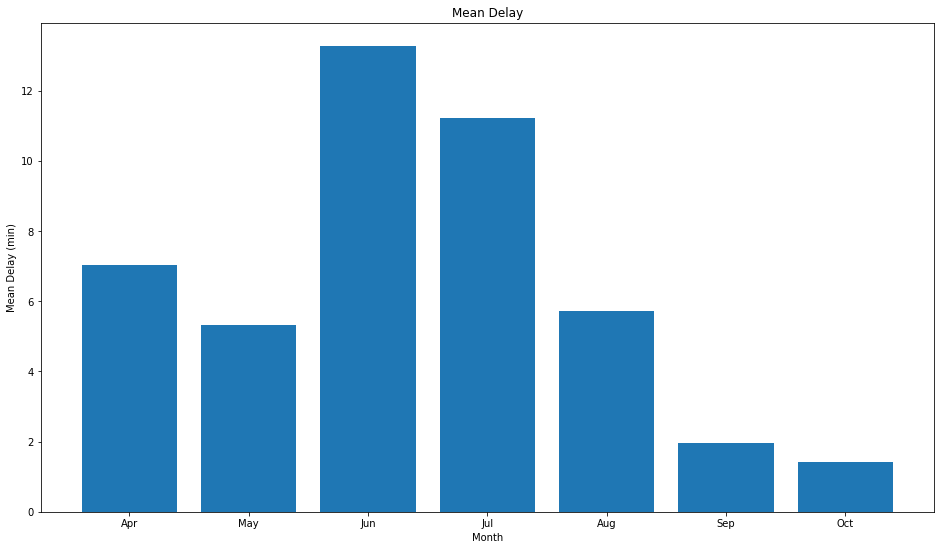

In [25]:
month_names = ('Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct')
y_pos = np.arange(len(month_names))

plt.figure(figsize=(16,9))
plt.bar(y_pos,df_agg['mean'] , label='Mean Arrival Delay')
plt.xlabel('Month')
plt.ylabel('Mean Delay (min)')
plt.xticks(y_pos, month_names)

plt.title('Mean Delay')

plt.show()

[Text(0,0.5,'Mean Arrival Delay')]

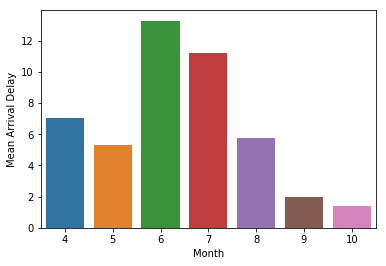

In [26]:
axis = sns.barplot(x="Month", y="mean", data=df_agg)
axis.set(ylabel='Mean Arrival Delay')

In [27]:
df_agg = df.groupby(['Carrier','Month'], axis=0)['ArrDelay'].agg(['sum', 'mean', 'max', 'count']).reset_index()
df_agg.head(20)

,Carrier,Month,sum,mean,max,count
0,9E,4,41088.0,3.518109,665.0,11679
1,9E,5,59948.0,4.997332,505.0,11996
2,9E,6,149522.0,13.417265,495.0,11144
3,9E,7,147504.0,13.193560,526.0,11180
4,9E,8,22780.0,1.982939,700.0,11488
5,9E,9,-28316.0,-2.825666,369.0,10021
6,9E,10,-11461.0,-1.101701,531.0,10403
7,AA,4,491421.0,12.320021,1440.0,39888
8,AA,5,337998.0,8.149439,1330.0,41475
9,AA,6,598153.0,14.618691,1466.0,40917


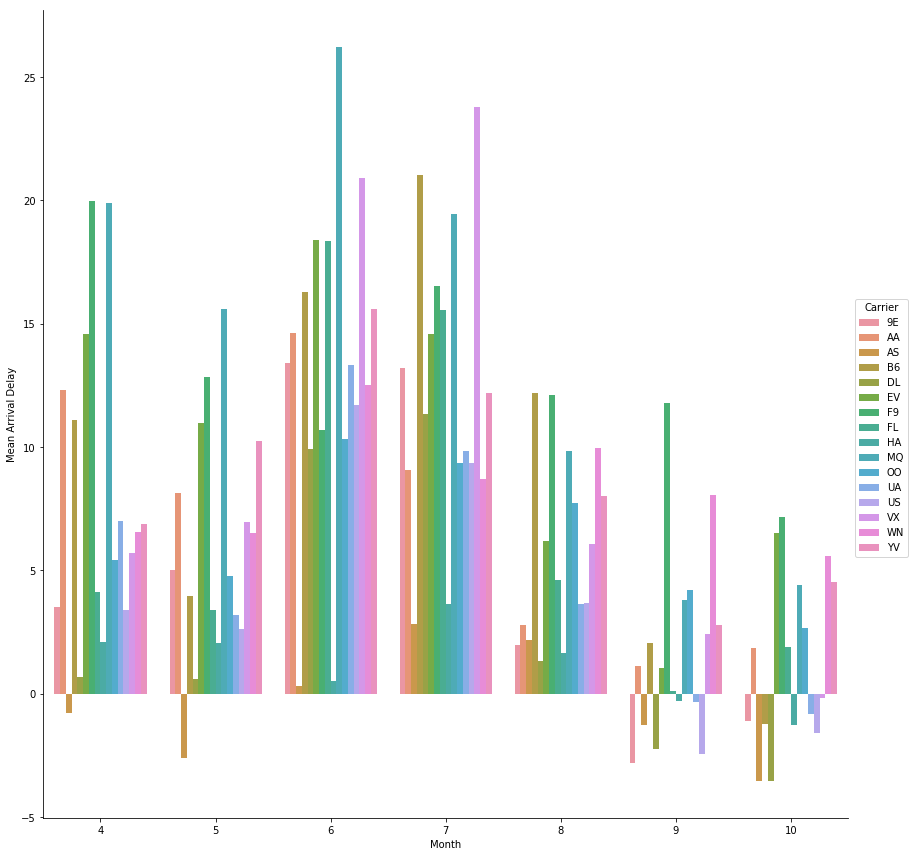

In [28]:
axis = sns.factorplot(x="Month", y="mean", data=df_agg, hue='Carrier', kind="bar", size=12)
axis.set(ylabel='Mean Arrival Delay')

In [29]:
df_agg = df.groupby(['Date'], axis=0)['ArrDelay'].agg(['sum', 'mean', 'max', 'count']).reset_index()
df_agg.head(20)

,Date,sum,mean,max,count
0,2013-04-01,42999.0,3.250113,1301.0,13230
1,2013-04-02,17207.0,1.325349,1187.0,12983
2,2013-04-03,-12176.0,-0.927271,1429.0,13131
3,2013-04-04,62673.0,4.697070,795.0,13343
4,2013-04-05,9612.0,0.719246,537.0,13364
5,2013-04-06,-33477.0,-3.040599,665.0,11010
6,2013-04-07,-38565.0,-3.046209,448.0,12660
7,2013-04-08,59431.0,4.514661,779.0,13164
8,2013-04-09,76809.0,6.051288,771.0,12693
9,2013-04-10,312406.0,25.185908,960.0,12404


Use Pandas DataFrame plot method to create a line chart by date and mean arrival delay

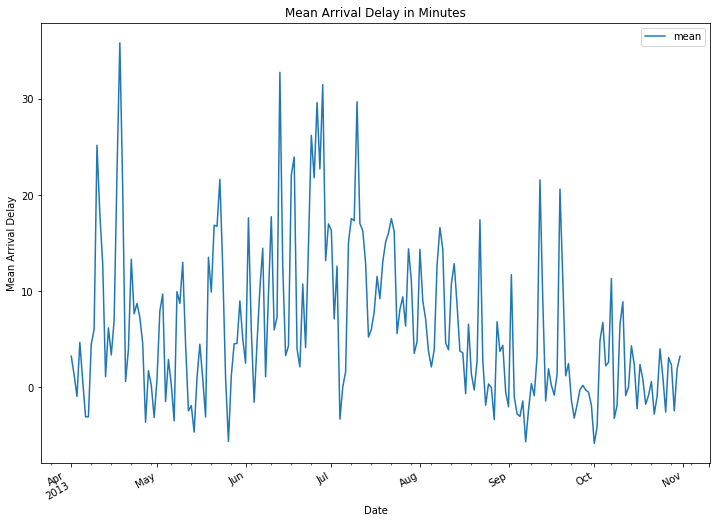

In [30]:
ax = df_agg.plot(x="Date", y="mean", figsize=(12,9), title="Mean Arrival Delay in Minutes")
ax.set_ylabel("Mean Arrival Delay")
ax.set_xlabel("Date")

ax.figure.autofmt_xdate()

### Modeling DataSet

In [31]:
# One Hot Encoding
# Represent categorical variables as binary vectors
# prefix=['Carrier_','DestAirportID_','OriginAirportID_'],
df = pd.get_dummies(df,  columns=['Carrier','DestAirportID','OriginAirportID'],sparse=False)
df.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,...,OriginAirportID_14747,OriginAirportID_14771,OriginAirportID_14831,OriginAirportID_14843,OriginAirportID_14869,OriginAirportID_14893,OriginAirportID_14908,OriginAirportID_15016,OriginAirportID_15304,OriginAirportID_15376
0,2013,4,19,5,837,-3.0,0.0,1138,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2013,4,19,5,1705,0.0,0.0,2336,-8.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,2013,4,19,5,600,-4.0,0.0,851,-15.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2013,4,19,5,1630,28.0,1.0,1903,24.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,2013,4,19,5,1615,-6.0,0.0,1805,-11.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Drop all columns not used in the modeling process
df.drop(['Year', 'DayofMonth', 'CRSDepTime', 'CRSArrTime', 'ArrDel15', 'Date', 'Cancelled', 'DepDel15'], axis=1, inplace=True)
df.head()

,Month,DayOfWeek,DepDelay,ArrDelay,Carrier_9E,Carrier_AA,Carrier_AS,Carrier_B6,Carrier_DL,Carrier_EV,...,OriginAirportID_14747,OriginAirportID_14771,OriginAirportID_14831,OriginAirportID_14843,OriginAirportID_14869,OriginAirportID_14893,OriginAirportID_14908,OriginAirportID_15016,OriginAirportID_15304,OriginAirportID_15376
0,4,5,-3.0,1.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,4,5,0.0,-8.0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,4,5,-4.0,-15.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,5,28.0,24.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,4,5,-6.0,-11.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Modeling

### Ridge Regression

In [48]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [34]:
X = df.drop(['ArrDelay'], axis=1)
y = df['ArrDelay']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2017788, 159)
(2017788,)
(672597, 159)
(672597,)


## Ridge

In [36]:
ridge = Ridge(alpha=1.0)

In [37]:
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [38]:
# Returns the coefficient of determination R^2 of the prediction.
# best possible score is 1.0
ridge_score = ridge.score(X_test, y_test)

In [39]:
ridge_score

0.8906102769383131

In [40]:
scores = cross_val_score(Ridge(), X, y)
print(scores)

[0.89062803 0.8986249  0.86276002]


In [41]:
y_predictions = ridge.predict(X_test)

In [42]:
y_predictions

array([-12.18226223, -10.88609469, -10.08868175, ...,  -5.44400283,
        -7.59888364,  43.0907868 ])

In [43]:
scores = cross_val_score(Ridge(alpha=10.0), X, y)
print(scores)

[0.89062848 0.89862518 0.86276106]


In [44]:
scores = cross_val_score(Ridge(alpha=0.01), X, y)
print(scores)

[0.89062798 0.89862487 0.86275991]


In [45]:
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_score = lasso.score(X_test, y_test)

In [46]:
lasso_score

0.8865152378445396

In [49]:
en = ElasticNet()
en.fit(X_train, y_train)
en_score = en.score(X_test, y_test)
en_score

0.8865496876617677

## Make Predictions on the Test Set

In [51]:
df_test_set = pd.read_csv('../../data/azureml/dat203/Test-Flights.csv')

In [52]:
df_test_set.head(30)

,Row ID,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,1,2013,6,10,1,YV,14107,10800,1415,2,0,1534,0,0,0
1,2,2013,10,14,1,DL,10397,13244,2030,-2,0,2055,0,0,0
2,3,2013,6,19,3,AS,13891,14747,615,-3,0,848,0,0,0
3,4,2013,10,13,7,EV,10693,12953,950,-7,0,1302,0,0,0
4,5,2013,9,13,5,WN,13232,12191,1930,10,0,2155,0,0,0
5,6,2013,7,1,1,WN,11292,13198,1020,20,1,1255,0,0,0
6,7,2013,8,16,5,WN,13204,10529,945,-2,0,1220,0,0,0
7,8,2013,6,26,3,EV,11618,11433,600,283,1,751,0,0,0
8,9,2013,10,23,3,OO,13851,12266,1203,-1,0,1327,0,0,0
9,10,2013,10,30,3,EV,13198,13930,600,-8,0,722,0,0,0


In [53]:
# create dummies out of the test set columns
df_test_set = pd.get_dummies(df_test_set,  columns=['Carrier','DestAirportID','OriginAirportID'],sparse=False)
df_test_set.head()

,Row ID,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,...,OriginAirportID_13198,OriginAirportID_13204,OriginAirportID_13232,OriginAirportID_13495,OriginAirportID_13851,OriginAirportID_13891,OriginAirportID_13930,OriginAirportID_14107,OriginAirportID_14492,OriginAirportID_15016
0,1,2013,6,10,1,1415,2,0,1534,0,...,0,0,0,0,0,0,0,1,0,0
1,2,2013,10,14,1,2030,-2,0,2055,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2013,6,19,3,615,-3,0,848,0,...,0,0,0,0,0,1,0,0,0,0
3,4,2013,10,13,7,950,-7,0,1302,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2013,9,13,5,1930,10,0,2155,0,...,0,0,1,0,0,0,0,0,0,0


In [54]:
# drop the same columns from the training set that we are not going to be using
df_test_set.drop(['Year', 'DayofMonth', 'CRSDepTime', 'CRSArrTime', 'ArrDel15', 'Cancelled', 'DepDel15'], axis=1, inplace=True)

In [55]:
# notice that the number of columns in the test set is much less than the training set
len(df_test_set.columns)

51

In [56]:
df_test_set.columns

Index(['Row ID', 'Month', 'DayOfWeek', 'DepDelay', 'ArrDelay', 'Carrier_9E',
       'Carrier_AA', 'Carrier_AS', 'Carrier_DL', 'Carrier_EV', 'Carrier_FL',
       'Carrier_OO', 'Carrier_UA', 'Carrier_WN', 'Carrier_YV',
       'DestAirportID_10529', 'DestAirportID_10693', 'DestAirportID_10800',
       'DestAirportID_11259', 'DestAirportID_11433', 'DestAirportID_12191',
       'DestAirportID_12266', 'DestAirportID_12339', 'DestAirportID_12953',
       'DestAirportID_13198', 'DestAirportID_13204', 'DestAirportID_13232',
       'DestAirportID_13244', 'DestAirportID_13930', 'DestAirportID_14122',
       'DestAirportID_14747', 'DestAirportID_14908', 'OriginAirportID_10397',
       'OriginAirportID_10693', 'OriginAirportID_11042',
       'OriginAirportID_11057', 'OriginAirportID_11278',
       'OriginAirportID_11292', 'OriginAirportID_11298',
       'OriginAirportID_11618', 'OriginAirportID_12892',
       'OriginAirportID_13198', 'OriginAirportID_13204',
       'OriginAirportID_13232', 'OriginA

In [57]:
# first drop the ArrDelay from the X test set (X2) because that is what we are predicting
X2 = df_test_set.drop(['ArrDelay'], axis=1)

In [58]:
# for everyone column that is in the training data, that is NOT in the test set, add a column of zeros.
# we can do this because of the dummies, and if the column did not exist, it has a zero.
for c_x in X.columns:
    if c_x not in X2.columns:
        #print(f"X column not in test columns: {c_x}")
        X2[c_x] = 0

In [59]:
# make sure the number of columns is the same, and remove the Row ID index from X2
X2.drop(['Row ID'], axis=1, inplace=True)
print(len(X.columns))
print(len(X2.columns))

159
159


In [60]:
X2.head()

,Month,DayOfWeek,DepDelay,Carrier_9E,Carrier_AA,Carrier_AS,Carrier_DL,Carrier_EV,Carrier_FL,Carrier_OO,...,OriginAirportID_14730,OriginAirportID_14747,OriginAirportID_14771,OriginAirportID_14831,OriginAirportID_14843,OriginAirportID_14869,OriginAirportID_14893,OriginAirportID_14908,OriginAirportID_15304,OriginAirportID_15376
0,6,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,1,-2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,3,-3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10,7,-7,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,5,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
y2_predictions = ridge.predict(X2)

In [62]:
print(y2_predictions)

[  3.77251566  -3.8938306   -2.86071415  -8.55929802  10.99536194
  21.02212807  -2.805496   279.57883573  -0.84993717 -12.53619955
  -9.47468509  14.17369479 -11.3674717   -8.38515564  -1.14776477
  -1.29947778  -2.07889327 -10.33226806  -2.41802715  -2.39789331
   1.25719057   3.17135915 -10.1057799    8.049489    11.09332078]


In [67]:
for i, y2_pred in enumerate(y2_predictions):
    print(f"{i+1}: {y2_pred}")

1: 3.7725156569882055
2: -3.8938305993689077
3: -2.8607141466171035
4: -8.559298023634756
5: 10.995361938712417
6: 21.022128070393833
7: -2.805496001663778
8: 279.5788357328236
9: -0.8499371728121856
10: -12.53619955079647
11: -9.474685085304962
12: 14.173694794031123
13: -11.367471700298589
14: -8.385155635822157
15: -1.1477647726290232
16: -1.2994777816885998
17: -2.078893274211619
18: -10.332268058516082
19: -2.4180271470933983
20: -2.397893311691361
21: 1.2571905723881875
22: 3.1713591494909856
23: -10.105779900346644
24: 8.049489003493031
25: 11.093320782452446


### Scored Results

3.7725156569882055

-3.8938305993689077 - Wrong

-2.8607141466171035

-8.559298023634756

10.995361938712417 - Wrong

21.022128070393833

-2.805496001663778 - Wrong

279.5788357328236

-0.8499371728121856

-12.53619955079647 - Wrong

-9.474685085304962

14.173694794031123

-11.367471700298589

-8.385155635822157

-1.1477647726290232

-1.2994777816885998

-2.078893274211619

-10.332268058516082

-2.4180271470933983

-2.397893311691361

1.2571905723881875

3.1713591494909856 - Wrong

-10.105779900346644

8.049489003493031

11.093320782452446


First Attempt was 20 /25


In [64]:
y_en_predictions = en.predict(X2)
y_en_predictions

array([ -1.89140541,  -6.06911417,  -6.94826963, -11.14965532,
         6.05069275,  16.23526527,  -6.02194702, 281.62720361,
        -5.07194748, -12.13498354,  -4.9538429 ,  13.10189035,
       -11.05513431,  -9.03712401,  -4.85349602,  -3.84449087,
        -3.8504101 ,  -9.07254605,  -1.96224949,  -7.00144937,
        -0.82339465,   2.98825526, -10.06971274,  10.03945285,
         8.14546637])